In [1]:
import tensorflow as tf
from keras.utils import np_utils
import numpy as np

import os

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load & explore data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(f'{X_train.shape=}')
print(f'{y_train.shape=}')

print(f'{X_test.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
X_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


### 1.1 Sample different ways to write each number

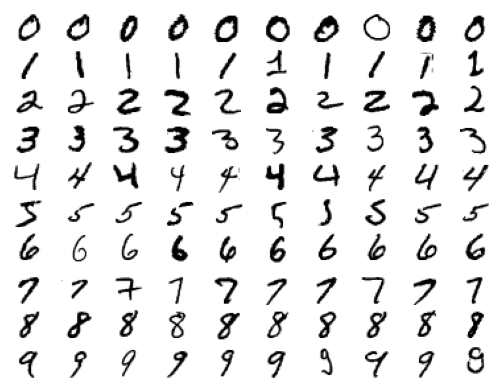

In [4]:
fig, axes = plt.subplots(10, 10, gridspec_kw = {'wspace':0, 'hspace':0})

for num in range(10):
    row_num = num
    digits = X_train[np.argwhere(y_train==num)[:10].flatten()]
    for col_num, digit in enumerate(digits):
        ax = axes[row_num, col_num]
        ax.imshow(digit, cmap=plt.cm.gray_r, vmin=0, vmax=255)
        ax.axis('off')
        ax.set_aspect('equal')

### 1.2 Check if classes are balanced

Text(0, 0.5, 'Number of samples')

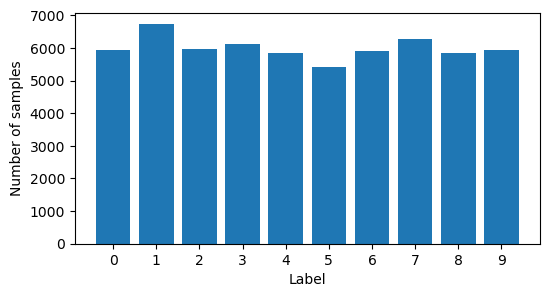

In [5]:
labels, num_samples = np.unique(y_train, return_counts=True)

fig2, ax2 = plt.subplots(figsize=(6,3))
ax2.bar(labels, num_samples)
ax2.set_xlabel('Label')
ax2.set_xticks(range(len(labels)))
ax2.set_ylabel('Number of samples')

## 2 Transform data

In [6]:
# flatten each 28 x 28 image into 784 x 1 array
X_train = X_train.reshape(60_000, 784)
X_test = X_test.reshape(10_000, 784)

In [7]:
# normalizing the data
# divide by 255.0 to convert dtype to float
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')

X_train.shape=(60000, 784)
X_test.shape=(10000, 784)


In [9]:
# one-hot encoding using keras' numpy-related utilities
n_classes = len(labels)
print("Shape before one-hot encoding: ", y_train.shape)

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


## 3. Model

### 3.1 Sequential model

In [10]:
# building a linear stack of layers with the sequential model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(784,)))
model.add(tf.keras.layers.Activation('relu'))                            
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

Metal device set to: Apple M1 Pro


2023-02-15 13:22:33.742422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-15 13:22:33.742548: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# compiling the sequential model
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [13]:
# training the model and saving metrics in history
history = model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=20,
    verbose=2,
    validation_data=(X_test, Y_test))

Epoch 1/20


2023-02-15 13:22:33.959205: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-15 13:22:34.091253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-15 13:22:39.830481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 - 6s - loss: 0.2453 - accuracy: 0.9274 - val_loss: 0.1109 - val_accuracy: 0.9670 - 6s/epoch - 14ms/step
Epoch 2/20
469/469 - 5s - loss: 0.0996 - accuracy: 0.9698 - val_loss: 0.0744 - val_accuracy: 0.9766 - 5s/epoch - 11ms/step
Epoch 3/20
469/469 - 5s - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.0750 - val_accuracy: 0.9764 - 5s/epoch - 11ms/step
Epoch 4/20
469/469 - 5s - loss: 0.0524 - accuracy: 0.9833 - val_loss: 0.0668 - val_accuracy: 0.9786 - 5s/epoch - 11ms/step
Epoch 5/20
469/469 - 5s - loss: 0.0438 - accuracy: 0.9860 - val_loss: 0.0643 - val_accuracy: 0.9812 - 5s/epoch - 11ms/step
Epoch 6/20
469/469 - 5s - loss: 0.0364 - accuracy: 0.9879 - val_loss: 0.0724 - val_accuracy: 0.9791 - 5s/epoch - 10ms/step
Epoch 7/20
469/469 - 5s - loss: 0.0332 - accuracy: 0.9887 - val_loss: 0.0673 - val_accuracy: 0.9815 - 5s/epoch - 10ms/step
Epoch 8/20
469/469 - 5s - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0681 - val_accuracy: 0.9807 - 5s/epoch - 10ms/step
Epoch 9/20
469/469 - 5s - l

In [14]:
# saving the model
save_dir = "./results/"
model_name = 'keras_mnist_sequential.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print(f'Saved trained model at {model_path}')

Saved trained model at ./results/keras_mnist_sequential.h5


In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

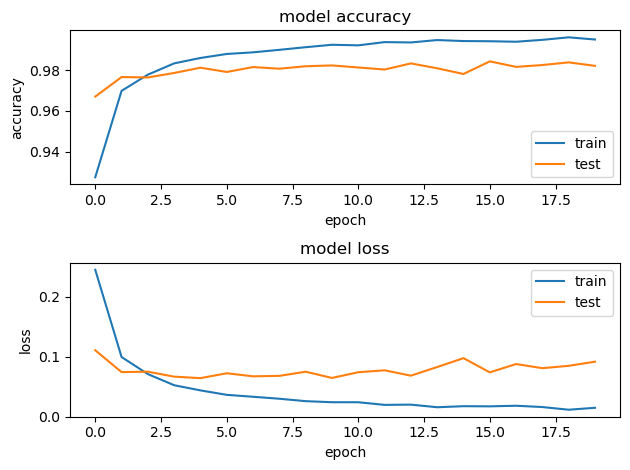

In [16]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## 4. Evaluate performance

In [17]:
mnist_model = tf.keras.models.load_model('./results/keras_mnist.h5')

In [18]:
predicted_probs = mnist_model.predict(X_test)
predicted_classes = np.argmax(predicted_probs, axis=1)

 82/313 [======>.......................] - ETA: 0s

2023-02-15 13:24:14.844238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [19]:
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

2023-02-15 13:24:15.574892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 2s - loss: 0.0877 - accuracy: 0.9821 - 2s/epoch - 7ms/step
Test Loss 0.0877348855137825
Test Accuracy 0.9821000695228577


In [20]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [21]:
predicted_classes[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [22]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [23]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, predicted_classes)

[Text(0.5, 23.52222222222222, 'predicted class'),
 Text(50.722222222222214, 0.5, 'actual class')]

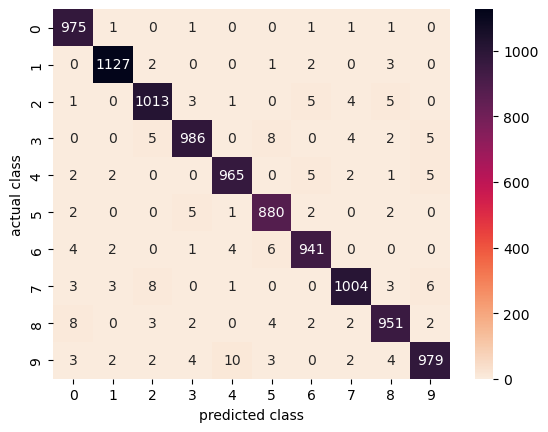

In [24]:
hmap = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt='.0f',
    cmap=sns.cm.rocket_r)

hmap.set(xlabel='predicted class', ylabel='actual class')

Observations:
- Majority of predictions are on the correct diagonal
- 3 and 5; 4 and 9 are commonly mistaken pairs, which is understandable

## 5. Next steps

* Augment data
* Use a different model (eg. CNN)